<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = ваш балл + котобонус

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Чтобы результаты были воспроизводимы`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ

Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков**

In [111]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [112]:
#Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4249,Mahindra Bolero SLX,2007,245000,110000,Diesel,Individual,Manual,Third Owner,13.6 kmpl,2523 CC,63 bhp,180 Nm at 1440-1500rpm,7.00
3850,Renault KWID RXT Optional,2019,350000,15000,Petrol,Individual,Manual,First Owner,25.17 kmpl,799 CC,53.3 bhp,72Nm@ 4386rpm,5.00
4370,Mahindra XUV500 W6 2WD,2014,525000,120000,Diesel,Individual,Manual,First Owner,15.1 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.00
3158,Mahindra XUV500 W8 4WD,2013,800000,150000,Diesel,Individual,Manual,Second Owner,15.1 kmpl,2179 CC,140 bhp,330Nm@ 1600-2800rpm,7.00
1121,Chevrolet Sail 1.3 LS,2016,250000,60000,Diesel,Individual,Manual,Second Owner,22.1 kmpl,1248 CC,74 bhp,190Nm@ 1750rpm,5.00
3822,Mahindra Scorpio 1.99 S4,2015,800000,70000,Diesel,Individual,Manual,First Owner,15.4 kmpl,1997 CC,120 bhp,280Nm@ 1800-2800rpm,7.00
6598,Maruti Alto 800 LXI Airbag,2015,250000,70000,Petrol,Individual,Manual,First Owner,22.74 kmpl,796 CC,47.3 bhp,69Nm@ 3500rpm,5.00
2935,Maruti Alto K10 VXI AGS Optional,2017,400000,10000,Petrol,Individual,Automatic,First Owner,23.95 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.00
5793,Tata Nano Lx BSIV,2010,45000,30400,Petrol,Individual,Manual,Fourth & Above Owner,26.0 kmpl,624 CC,35 bhp,"48@ 3,000+/-500(NM@ rpm)",4.00
2342,Maruti Baleno Alpha 1.2,2018,700000,13000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.00


In [113]:
#Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
pd.concat([df_test.head(5), df_test.tail(5)])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.00
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.00
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.00
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.00
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.00
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.00
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.00
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.00
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.00
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.00


In [114]:
#Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
missed_train = df_train.isna().sum()[df_train.isna().sum() > 0].index.tolist()
df_train[missed_train].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    6797 non-null   object 
 1   engine     6797 non-null   object 
 2   max_power  6803 non-null   object 
 3   torque     6796 non-null   object 
 4   seats      6797 non-null   float64
dtypes: float64(1), object(4)
memory usage: 273.5+ KB


In [115]:
#Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
missed_test = df_test.isna().sum()[df_test.isna().sum() > 0].index.tolist()
df_test[missed_test].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    981 non-null    object 
 1   engine     981 non-null    object 
 2   max_power  981 non-null    object 
 3   torque     981 non-null    object 
 4   seats      981 non-null    float64
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [116]:
#Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
print('Дубликаты в df_test:', df_test.duplicated().sum())
print('Дубликаты в df_train:', df_train.duplicated().sum())

Дубликаты в df_test: 62
Дубликаты в df_train: 985


In [117]:
#Постройте дашборд, используя ydata-profilling(0.15 балла)
!pip install ydata-profiling -q
from ydata_profiling import ProfileReport

In [118]:
profile_train = ProfileReport(df_train, title='Profiling Report Train Dataset')
profile_train.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [119]:
# очистим данные перед заполнением пропусков и расчетом медианы
df_lst = [df_train, df_test]
for df in df_lst:
  df['engine'] = df['engine'].str.replace(' CC', '', regex=False)
  df['mileage'] = df['mileage'].str.replace(' kmpl| km/kg', '', regex=True)
  df['max_power'] = df['max_power'].str.replace(' bhp', '', regex=False)

In [120]:
# приведем данные в нужный формат
df_train[missed_train] = df_train[missed_train].apply(pd.to_numeric, downcast='float', errors='coerce')
df_test[missed_test] = df_test[missed_test].apply(pd.to_numeric, downcast='float', errors='coerce')

In [121]:
# сразу удалим колонку torque (задание идет ниже, но уместнее это сделать тут)
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)
missed_train.remove('torque')
missed_test.remove('torque')

In [122]:
# заполняем пропуски медианой, в тестовом наборе также заполняем медианой из тренировочного
for column in missed_train:
  train_median = df_train[column].median()
  df_train.loc[df_train[column].isna(), column] = train_median
  df_test.loc[df_test[column].isna(), column] = train_median

In [123]:
# так как пробег на определенный объем топлива (mileage) не может быть 0, рассматриваем эти значения как пропуски и заполняем медианой
df_train['mileage'].median()
df_train.loc[df_train['mileage']==0, 'mileage'] = df_train['mileage'].median()
df_test.loc[df_test['mileage']==0, 'mileage'] = df_train['mileage'].median()

In [124]:
# так как сомнительно, что пробег у машины с более чем четырьмя собственниками  равен 1, то заполним медианой
df_train.loc[df_train['km_driven']==1, 'km_driven'] = df_train['km_driven'].median()

In [125]:
# проверим количество пропусков после заполнения
df_train.isna().sum().to_frame().T

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
# проверим количество пропусков после заполнения
df_test.isna().sum().to_frame().T

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0,0,0,0,0,0,0,0,0,0,0,0


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [127]:
# Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить)
# Если есть, то сколько?
duplicates = df_train[df_train.duplicated(subset=df_train.columns.difference(['selling_price']))]
duplicates.shape

(1159, 12)

In [128]:
#  Отобразите такие объекты (0.15 балла)
duplicates.head(3)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.90,1197.00,82.00,5.00
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.00,85.80,5.00
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.10,1197.00,85.80,5.00


In [129]:
# Удалите повторяющиеся строки
# Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю
print(df_train.shape)
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep='first')
print(df_train.shape)

(6999, 12)
(5840, 12)


In [130]:
# Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков
df_train = df_train.reset_index(drop=True)

In [131]:
# колонку torque уже удалили, поэтому то, что колонок 12 - ок
# заменил кол-во колонок
assert df_train.shape == (5840, 12)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [132]:
# ВСЕ ПУНКТЫ СДЕЛАНЫ ВЫШЕ

In [133]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float32
 9   engine         5840 non-null   float32
 10  max_power      5840 non-null   float32
 11  seats          5840 non-null   float32
dtypes: float32(4), int64(3), object(5)
memory usage: 456.4+ KB


In [134]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float32
 9   engine         1000 non-null   float32
 10  max_power      1000 non-null   float32
 11  seats          1000 non-null   float32
dtypes: float32(4), int64(3), object(5)
memory usage: 78.2+ KB


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [135]:
col = ['engine', 'seats']
df_train[col] = df_train[col].apply(pd.to_numeric, downcast='integer', errors='coerce')
df_test[col] = df_test[col].apply(pd.to_numeric, downcast='integer', errors='coerce')

In [136]:
df_train[col].dtypes

,0
engine,int16
seats,int8


In [137]:
df_test[col].dtypes

,0
engine,int16
seats,int8


### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [138]:
# уберем экспоненциальную нотацию для удобства
pd.options.display.float_format = '{:.2f}'.format
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00
mean,2013.43,522960.09,73962.52,19.47,1429.45,87.91,5.43
std,4.10,535432.00,60063.62,3.87,485.66,31.64,0.98
min,1983.00,29999.00,1000.00,9.00,624.00,0.00,2.00
25%,2011.00,250000.00,39000.00,17.00,1197.00,68.00,5.00
50%,2014.00,405000.00,70000.00,19.30,1248.00,81.86,5.00
75%,2017.00,640000.00,100000.00,22.30,1498.00,99.00,5.00
max,2020.00,10000000.00,2360457.00,42.00,3604.00,400.00,14.00


In [139]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,2013.68,617901.04,71393.34,19.36,1454.88,90.84,5.40
std,4.01,758553.86,48486.22,3.90,522.00,34.89,0.91
min,1995.00,31000.00,1303.00,9.50,624.00,34.20,4.00
25%,2011.00,250000.00,37000.00,16.55,1197.00,69.00,5.00
50%,2014.00,434999.00,61500.00,19.30,1248.00,82.42,5.00
75%,2017.00,670000.00,100000.00,22.30,1582.00,102.00,5.00
max,2020.00,6000000.00,375000.00,32.26,3604.00,280.00,9.00


In [140]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [141]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [142]:
assert df_train.shape == (5840, 12)

## **Визуализации**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

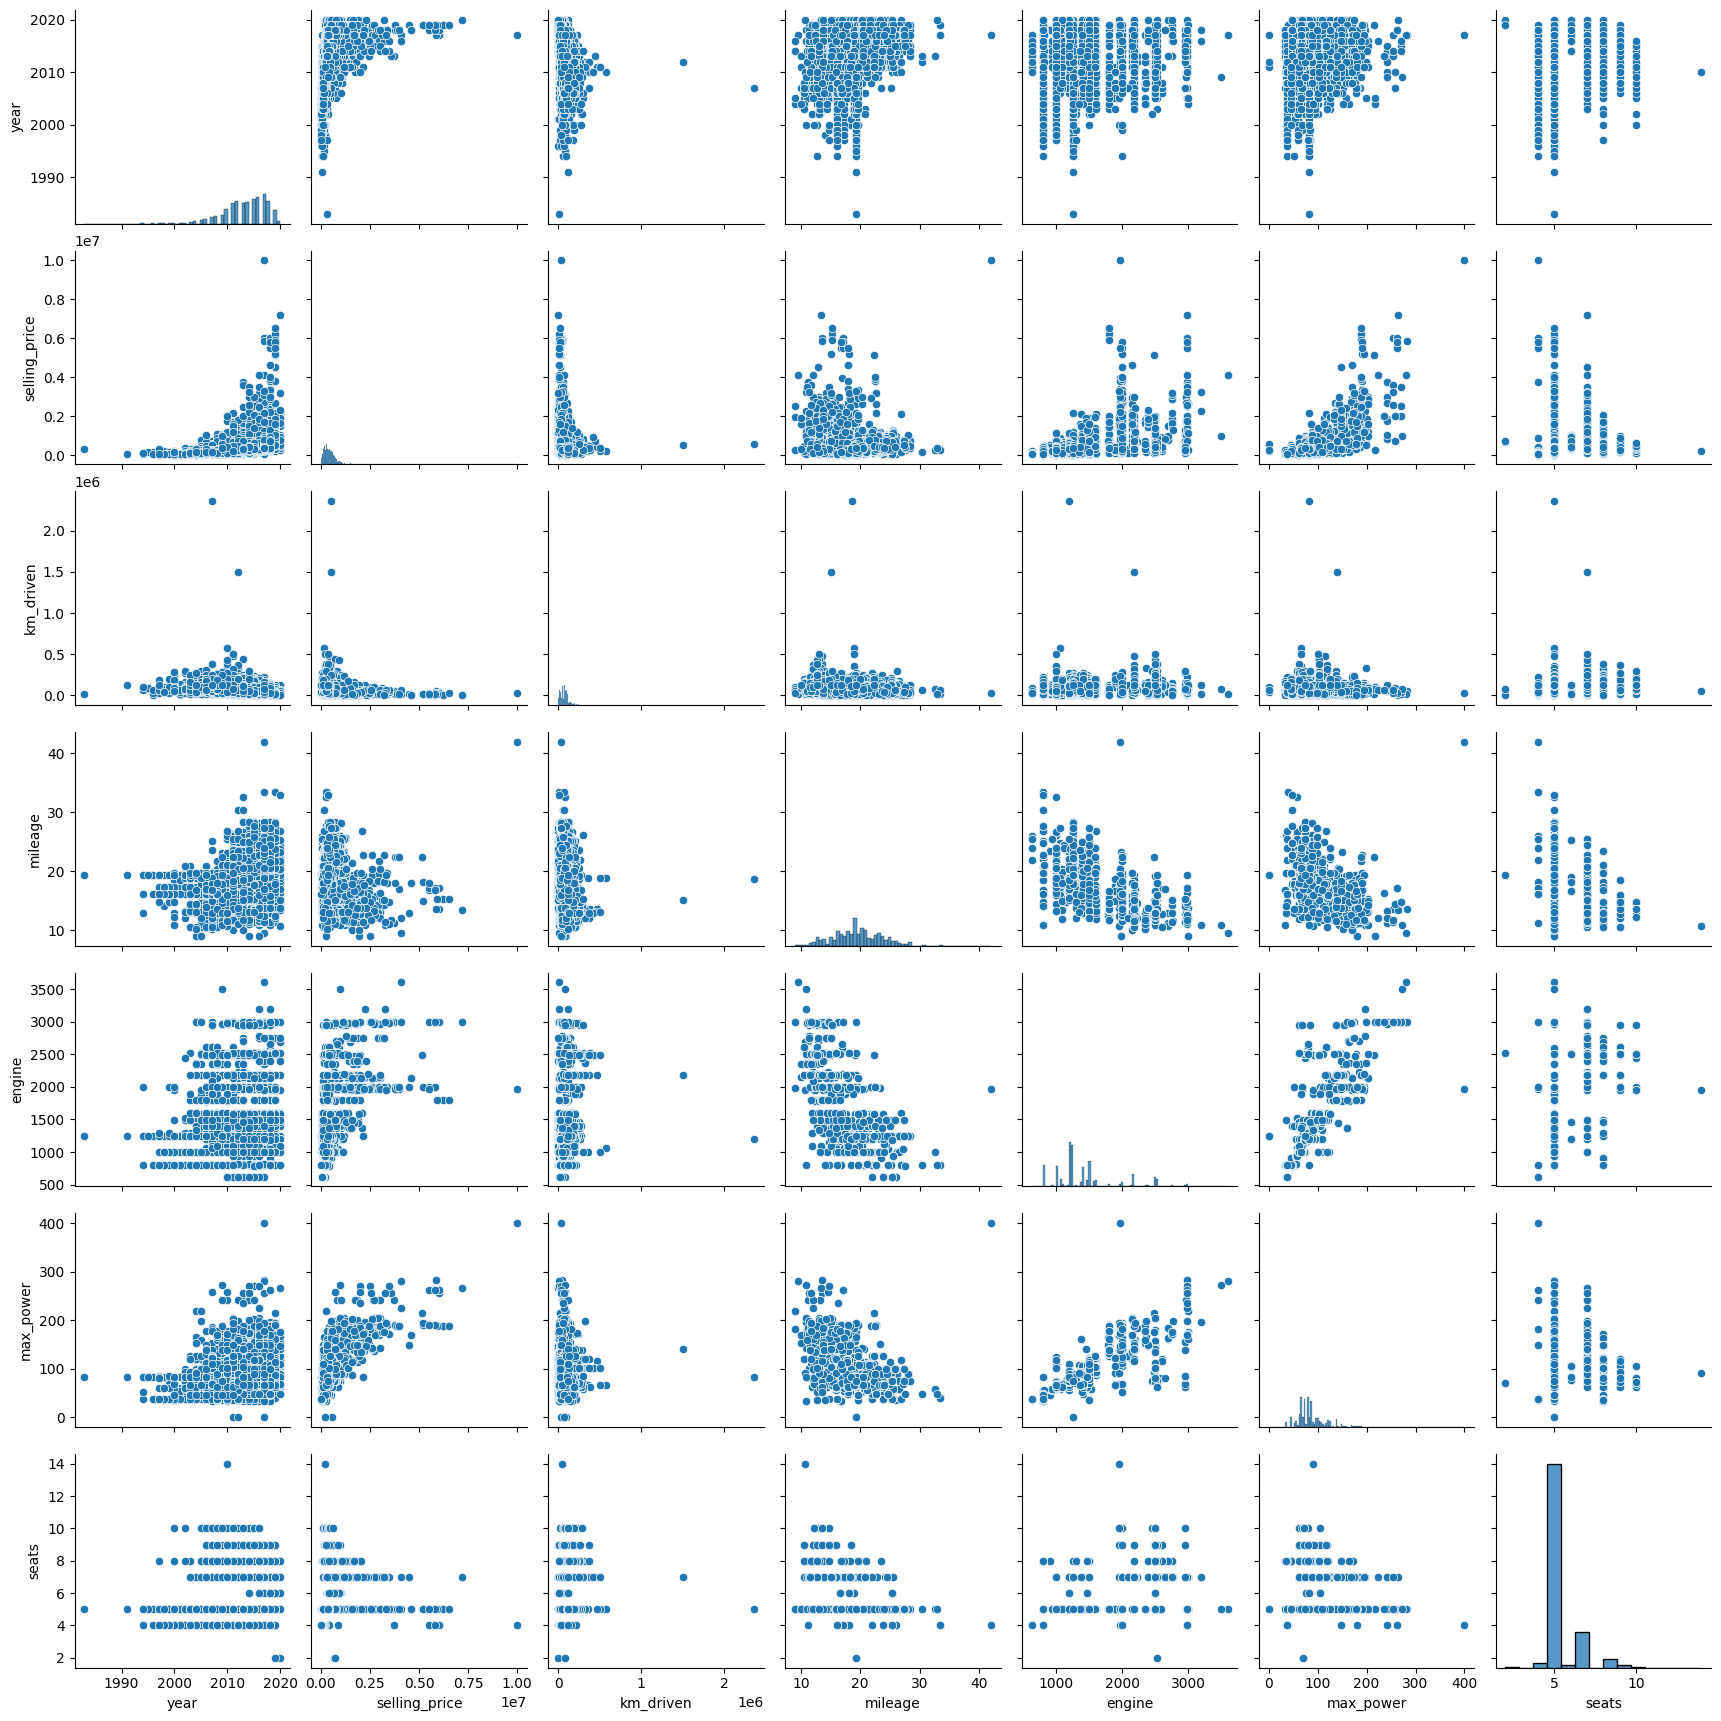

In [143]:
# Воспользуйтесь pairplot из библиотеки seabron, чтобы визуализировать попарные распределения числовых признаков для train
sns.pairplot(df_train)
plt.show()

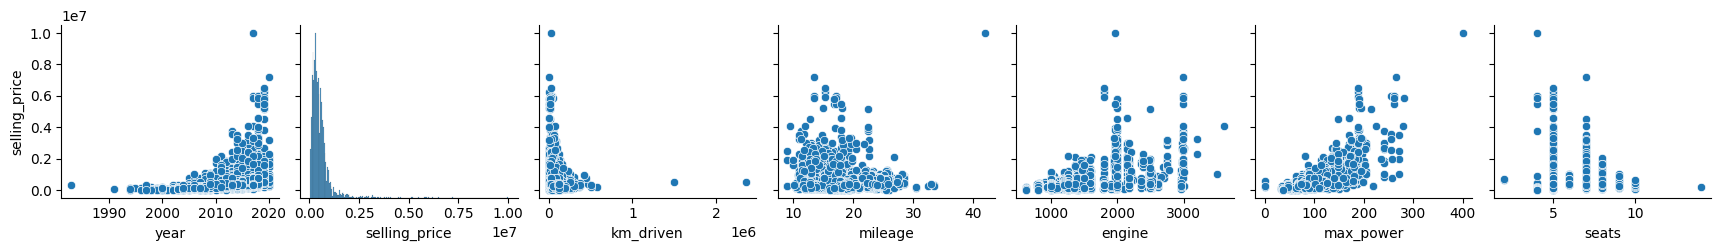

In [144]:
# посмотрим отдельно связь числовых признаков с целевой переменной
sns.pairplot(df_train, y_vars='selling_price', x_vars=df_train.select_dtypes(include='number').columns)
plt.show()

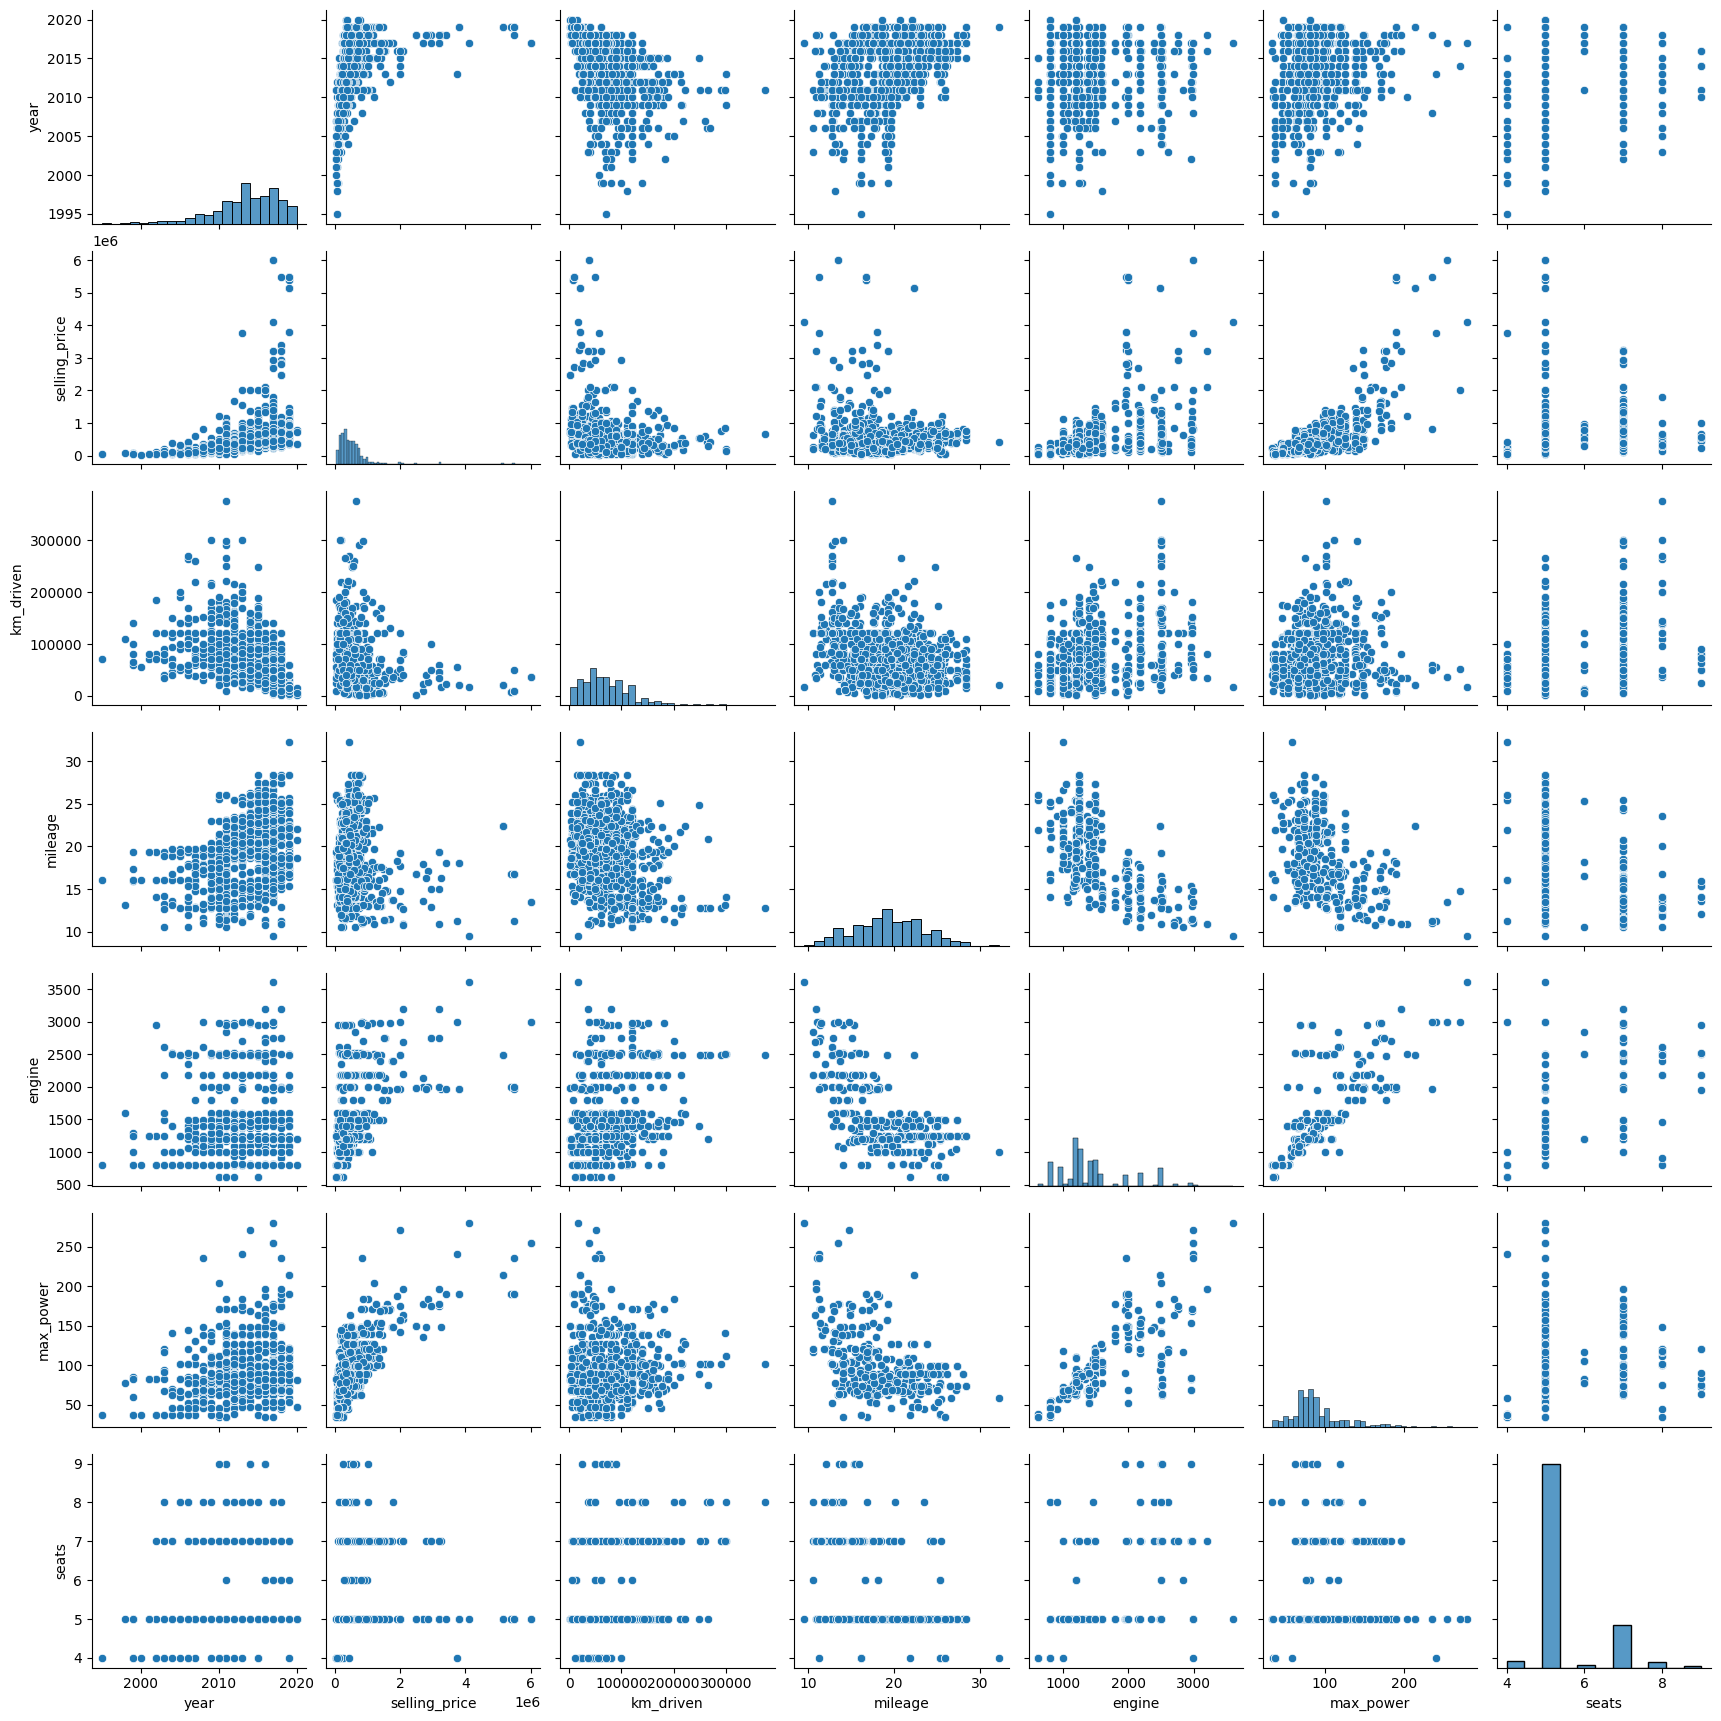

In [145]:
# Постройте pairplot по тестовым данным
# Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"
sns.pairplot(df_test)

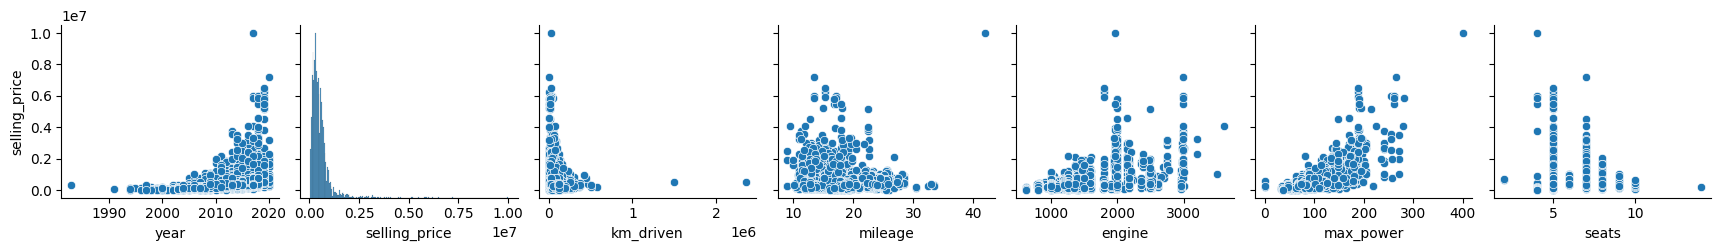

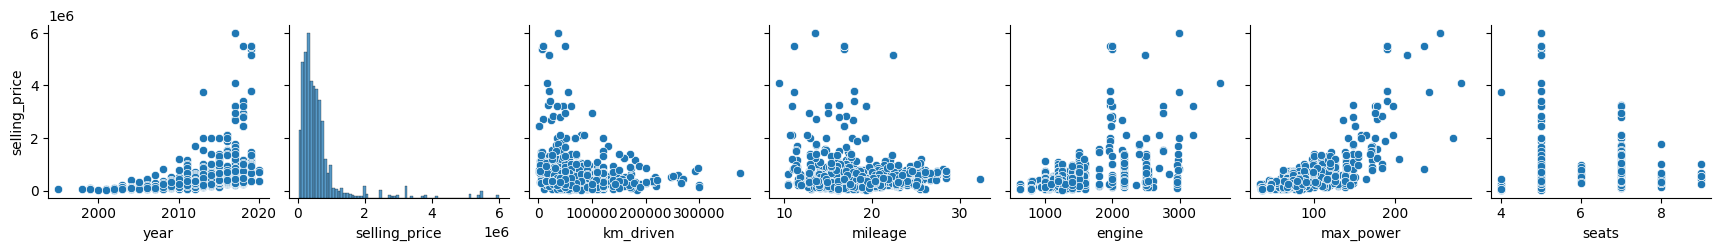

In [146]:
# посмотрим еще отдельно целевую переменную
sns.pairplot(df_train, y_vars='selling_price', x_vars=df_train.select_dtypes(include='number').columns)
sns.pairplot(df_test, y_vars='selling_price', x_vars=df_test.select_dtypes(include='number').columns)

*Можно ли предположить на основе распределений связь признаков с целевой переменной?*

Да, можно. Целевая переменная (selling_price) в целом растет вместе с year, max_power, engine, и убывает с km_driven

*Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?*

Да. Можно предположить, что есть корреляция между следующими признаками:

- selling_price и year
- selling_price и max_power
- selling_price и engine
- selling_price и km_driven
- mileage и engine
- mileage и max_power

*Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"*

Да, совокупности похожи. Формы распределений признаков между трейном и тестом совпадают, все взаимосвязи между числовыми признаками в целом сохранились.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [147]:
df_train.select_dtypes(include='number').corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.00,0.43,-0.37,0.35,0.00,0.16,0.04
selling_price,0.43,1.00,-0.16,-0.10,0.45,0.69,0.15
km_driven,-0.37,-0.16,1.00,-0.19,0.23,0.02,0.19
mileage,0.35,-0.10,-0.19,1.00,-0.59,-0.38,-0.47
engine,0.00,0.45,0.23,-0.59,1.00,0.68,0.65
max_power,0.16,0.69,0.02,-0.38,0.68,1.00,0.24
seats,0.04,0.15,0.19,-0.47,0.65,0.24,1.00


<Axes: >

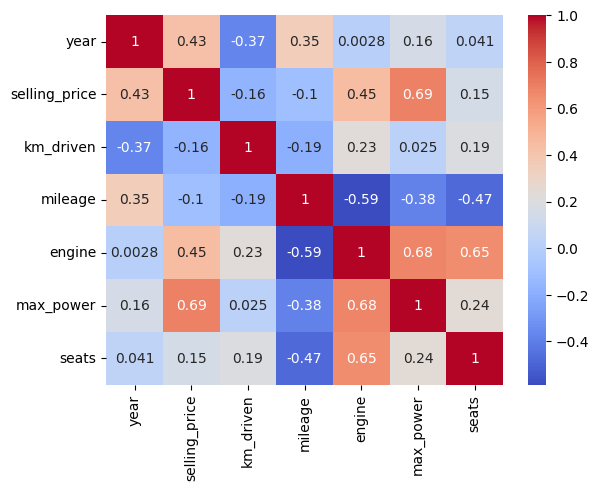

In [148]:
sns.heatmap(df_train.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')

In [149]:
# найдем наименьшую корреляцию между признаками
df_train.select_dtypes(include='number').corr().abs().unstack().sort_values(ascending=False).drop_duplicates().tail(1)

,,0
engine,year,0.00


In [150]:
# найдем признаки с самой сильной положительной линейной зависимостью
df_train.select_dtypes(include='number').corr().unstack().sort_values(ascending=False).drop_duplicates().head(5)

year       year            1.00
max_power  selling_price   0.69
           engine          0.68
engine     seats           0.65
           selling_price   0.45
dtype: float64

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

*Какие 2 признака наименее скоррелированы между собой?*

Это признаки engine и year

*Между какими наблюдается довольно сильная положительная линейная зависимость?*

Между max_power и selling_price

*Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?*

Нет, неправильно. Корреляция между годом и пробегом отрицательная, это значит, что чем больше год, тем, скорее всего, меньше пробег.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

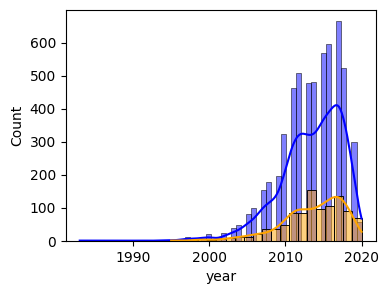

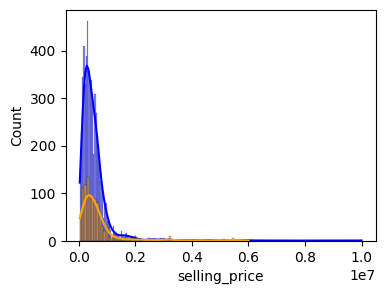

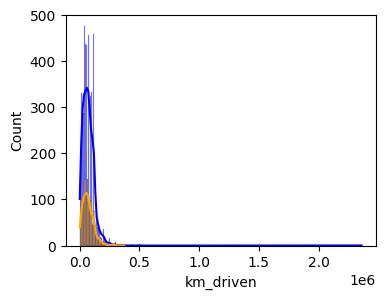

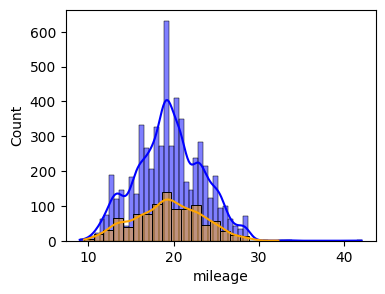

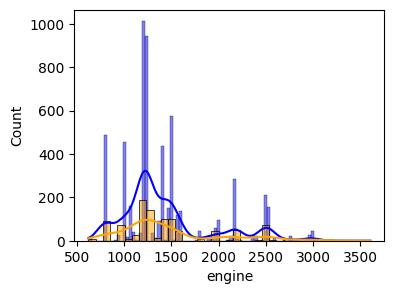

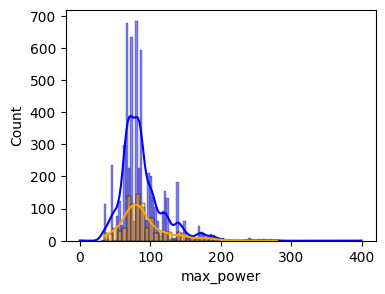

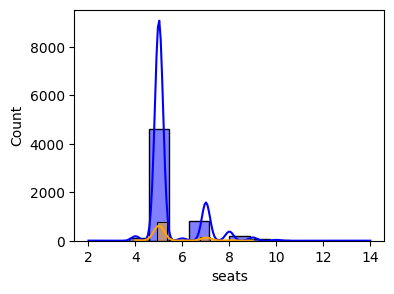

In [151]:
# стоит еще наложить распределения числовых признаков трейна и теста друг на друга, так как так гораздо проще их сравнивать
# видно, что формы распределений в целом совпадают, что подтверждает выводы, сделанные раньше
for col in df_train.select_dtypes(include='number').columns:
    plt.figure(figsize=(4, 3))
    sns.histplot(df_train[col], color='blue', label='train', kde=True, alpha=0.5)
    sns.histplot(df_test[col], color='orange', label='test', kde=True, alpha=0.5)

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [152]:
train = df_train.select_dtypes(include='number').copy()
test = df_test.select_dtypes(include='number').copy()

y_train = train['selling_price']
X_train = train.drop(columns='selling_price')

In [153]:
assert X_train.shape == (5840, 6)

In [154]:
y_test = test['selling_price']
X_test = test.drop(columns='selling_price')

In [155]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as mse

model = LinearRegression()
model.fit(X_train, y_train)

train_predictions_1 = model.predict(X_train)
test_predictions_1 = model.predict(X_test)

train_r2 = r2_score(y_train, train_predictions_1)
test_r2 = r2_score(y_test, test_predictions_1)
train_mse = mse(y_train, train_predictions_1)
test_mse = mse(y_test, test_predictions_1)

print('R2 на трейне:', round(train_r2, 4))
print('R2 на тесте:', round(test_r2, 4))
print('MSE на трейне:', round(train_mse**0.5, 2))
print('MSE на тесте:', round(test_mse**0.5, 2))

R2 на трейне: 0.5929
R2 на тесте: 0.5939
MSE на трейне: 341596.15
MSE на тесте: 483125.23


In [157]:
# посмотрим предсказание на трейне
df = df_train.copy()
df['predicted_price'] = train_predictions_1

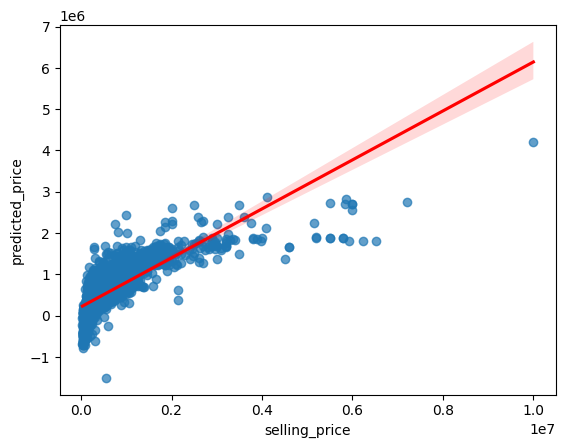

In [158]:
# визуализируем предсказанную цену и таргет
sns.regplot(x='selling_price', y='predicted_price', data=df, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.7})
plt.show()

<Axes: xlabel='selling_price', ylabel='Count'>

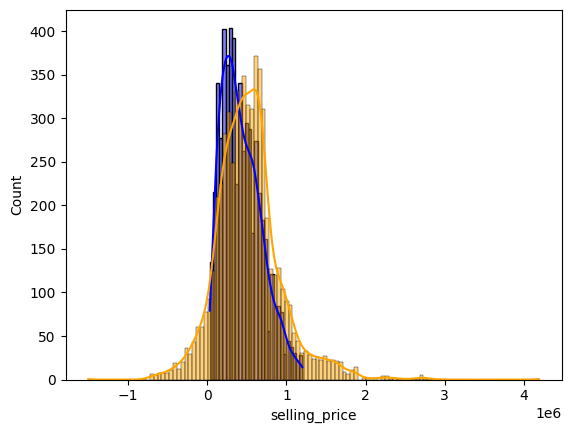

In [159]:
# посмотрим формы распределений между предсказанной ценой и таргетом
# выкинем значения больше 0.95 процентиля, чтобы нарисовать нормальный график
v = df[df['selling_price']<df['selling_price'].quantile(0.95)]['selling_price']
f = df[df['predicted_price']<df['predicted_price'].quantile(0.95)]['predicted_price']
sns.histplot(v, color='blue', label='train', kde=True, alpha=0.5)
sns.histplot(df['predicted_price'], color='orange', label='test', kde=True, alpha=0.5)

*Сделайте выводы по значениям метрик качества*

Модель не очень хорошая. По метрике R2 видно, что модель предсказывает цену лучше по сравнению с вариантом предсказания для каждого объекта просто средней цены. По графику регрессии кажется, что модель недостаточно обучилась (недостаточно учитывает специфику данных). По форме распределений видно, что они тоже не совсем совпадают - распределение таргета немного смещено влево, а предсказанной цены - вправо.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [161]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

train_predictions_2 = model.predict(X_train_scaled)
test_predictions_2 = model.predict(X_test_scaled)

train_r2 = r2_score(y_train, train_predictions_2)
test_r2 = r2_score(y_test, test_predictions_2)

train_mse = mse(y_train, train_predictions_2)
test_mse = mse(y_test, test_predictions_2)

print('R2 на трейне:', round(train_r2, 4))
print('R2 на тесте:', round(test_r2, 4))
print('MSE на трейне:', round(train_mse**0.5, 2))
print('MSE на тесте:', round(test_mse**0.5, 2))

R2 на трейне: 0.5929
R2 на тесте: 0.5939
MSE на трейне: 341596.15
MSE на тесте: 483125.23


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [162]:
pd.DataFrame(model.coef_, index=X_train_scaled.columns, columns=["coef"])

,coef
year,149735.42
km_driven,-44702.44
mileage,35349.96
engine,62699.37
max_power,324414.07
seats,-20575.36


Наиболее информативный признак - max_power

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [163]:
from sklearn.linear_model import Lasso

lst = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]

for a in lst:
  lasso = Lasso(alpha=a)
  lasso.fit(X_train_scaled, y_train)

  train_predictions = lasso.predict(X_train_scaled)
  test_predictions = lasso.predict(X_test_scaled)

  train_r2 = r2_score(y_train, train_predictions)
  test_r2 = r2_score(y_test, test_predictions)

  train_mse = mse(y_train, train_predictions)
  test_mse = mse(y_test, test_predictions)
  print('Альфа:', a)
  print('R2 на трейне:', round(train_r2, 4))
  print('R2 на тесте:', round(test_r2, 4))
  print('MSE на трейне:', round(train_mse**0.5, 2))
  print('MSE на тесте:', round(test_mse**0.5, 2))
  print('---------------------')

Альфа: 0.01
R2 на трейне: 0.5929
R2 на тесте: 0.5939
MSE на трейне: 341596.15
MSE на тесте: 483125.24
---------------------
Альфа: 0.1
R2 на трейне: 0.5929
R2 на тесте: 0.5939
MSE на трейне: 341596.15
MSE на тесте: 483125.3
---------------------
Альфа: 1
R2 на трейне: 0.5929
R2 на тесте: 0.5939
MSE на трейне: 341596.15
MSE на тесте: 483125.91
---------------------
Альфа: 10
R2 на трейне: 0.5929
R2 на тесте: 0.5939
MSE на трейне: 341596.15
MSE на тесте: 483132.05
---------------------
Альфа: 100
R2 на трейне: 0.5929
R2 на тесте: 0.5938
MSE на трейне: 341596.3
MSE на тесте: 483193.73
---------------------
Альфа: 1000
R2 на трейне: 0.5929
R2 на тесте: 0.5928
MSE на трейне: 341610.5
MSE на тесте: 483815.97
---------------------
Альфа: 10000
R2 на трейне: 0.5901
R2 на тесте: 0.5819
MSE на трейне: 342792.47
MSE на тесте: 490212.99
---------------------
Альфа: 100000
R2 на трейне: 0.5237
R2 на тесте: 0.4767
MSE на трейне: 369475.25
MSE на тесте: 548476.55
---------------------
Альфа: 1000000


In [164]:
lasso = Lasso(alpha=1)
lasso.fit(X_train_scaled, y_train)

train_predictions_3 = lasso.predict(X_train_scaled)
test_predictions_3 = lasso.predict(X_test_scaled)

train_r2 = r2_score(y_train, train_predictions_3)
test_r2 = r2_score(y_test, test_predictions_3)

train_mse = mse(y_train, train_predictions_3)
test_mse = mse(y_test, test_predictions_3)
print('R2 на трейне:', round(train_r2, 4))
print('R2 на тесте:', round(test_r2, 4))
print('MSE на трейне:', round(train_mse**0.5, 2))
print('MSE на тесте:', round(test_mse**0.5, 2))

R2 на трейне: 0.5929
R2 на тесте: 0.5939
MSE на трейне: 341596.15
MSE на тесте: 483125.91


In [165]:
pd.DataFrame(lasso.coef_, index=X_train_scaled.columns, columns=["coeff"])

,coeff
year,149735.28
km_driven,-44701.31
mileage,35348.05
engine,62694.58
max_power,324414.91
seats,-20572.56


По метрикам R2 и MSE видно, что никакого улучшения качества модели не получили. Значения метрик остались такими же. Увеличение альфы в целом ухудшает качество модели. При альфе = 1 (по умолчанию) никакие веса не занулились, это может быть связано с тем, что т. к. признаков мало, модель считает все признаки важными для предсказания таргета

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [166]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.logspace(-4, 4, 100)}

grid_search = GridSearchCV(Lasso(), param_grid, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_lasso = grid_search.best_estimator_

train_predictions = best_lasso.predict(X_train_scaled)
test_predictions = best_lasso.predict(X_test_scaled)

print("Лучшее значение alpha:", grid_search.best_params_['alpha'])
print("R2 на трейне:", round(r2_score(y_train, train_predictions), 4))
print("R2 на тесте:", round(r2_score(y_test, test_predictions), 4))
print("MSE на трейне:", round(mse(y_train, train_predictions)**0.5, 2))
print("MSE на тесте:", round(mse(y_test, test_predictions)**0.5, 2))

Лучшее значение alpha: 10000.0
R2 на трейне: 0.5901
R2 на тесте: 0.5819
MSE на трейне: 342792.47
MSE на тесте: 490212.99


In [167]:
# Сколько грид-сёрчу пришлось обучать моделей?
print('Обучено', len(np.logspace(-4, 4, 100)) * 10, 'моделей')

Обучено 1000 моделей


In [168]:
# Какой коэффициент регуляризации у лучшей из перебранных моделей?
print(grid_search.best_params_['alpha'])

10000.0


In [169]:
# Занулились ли какие-нибудь из весов при такой регуляризации?
# занулился seats
pd.DataFrame(best_lasso.coef_, index=X_train_scaled.columns, columns=["coeff"])

,coeff
year,149518.58
km_driven,-33204.28
mileage,15088.49
engine,21215.95
max_power,329623.82
seats,-0.00


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [170]:
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': np.arange(0.1, 10, 0.1),
    'l1_ratio': np.arange(0.1, 1.1, 0.1)}

grid_search = GridSearchCV(ElasticNet(), param_grid, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_enet = grid_search.best_estimator_

train_predictions = best_enet.predict(X_train_scaled)
test_predictions = best_enet.predict(X_test_scaled)

print("Лучшее значение alpha:", grid_search.best_params_['alpha'])
print("Лучшее значение l1_ratio:", grid_search.best_params_['l1_ratio'])
print("R2 на трейне:", round(r2_score(y_train, train_predictions), 4))
print("R2 на тесте:", round(r2_score(y_test, test_predictions), 4))
print("MSE на трейне:", round(mse(y_train, train_predictions)**0.5, 2))
print("MSE на тесте:", round(mse(y_test, test_predictions)**0.5, 2))

#Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

Лучшее значение alpha: 1.5000000000000002
Лучшее значение l1_ratio: 0.9
R2 на трейне: 0.5851
R2 на тесте: 0.5614
MSE на трейне: 344852.76
MSE на тесте: 502109.5


In [171]:
print('Обучено', len(np.arange(0.1, 10, 0.1)) * len(np.arange(0.1, 1.1, 0.1)) * 10, 'моделей')

Обучено 9900 моделей


Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

alpha: 1.5

l1_ratio: 0.9

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [172]:
# код для удаления, но удалять не будем
# df_train = df_train.drop(columns='name')
# df_test = df_test.drop(columns='name')

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [173]:
df_train['name'].head()

,name
0,Maruti Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition
2,Hyundai i20 Sportz Diesel
3,Maruti Swift VXI BSIII
4,Hyundai Xcent 1.2 VTVT E Plus


In [174]:
# достанем марки автомобилей
df_train['name'] = df_train['name'].str.split(' ').str[0]
df_test['name'] = df_test['name'].str.split(' ').str[0]

In [175]:
df_train['name'].head()

,name
0,Maruti
1,Skoda
2,Hyundai
3,Maruti
4,Hyundai


In [176]:
# присвоим каждой марке сегмент автомобилей на основе рыночной классификации https://en.wikipedia.org/wiki/Car_classification
# сегмент обозначаем номером:
# 1 - City & Small Cars
# 2 - Medium & Large Cars
# 3 - SUV (внедорожники)
# 4 - Multi-Purpose & Sports Vehicles
# 5 - Luxury

cars = set(df_train['name'].unique().tolist() + df_test['name'].unique().tolist())
brands = {
    'Ambassador': 2,
    'Ashok': 4,
    'Audi': 5,
    'BMW': 5,
    'Chevrolet': 2,
    'Daewoo': 1,
    'Datsun': 1,
    'Fiat': 1,
    'Force': 4,
    'Ford': 2,
    'Honda': 2,
    'Hyundai': 1,
    'Isuzu': 4,
    'Jaguar': 5,
    'Jeep': 3,
    'Kia': 1,
    'Land': 3,
    'Lexus': 5,
    'MG': 2,
    'Mahindra': 3,
    'Maruti': 1,
    'Mercedes-Benz': 5,
    'Mitsubishi': 3,
    'Nissan': 3,
    'Opel': 2,
    'Peugeot': 2,
    'Renault': 1,
    'Skoda': 2,
    'Tata': 3,
    'Toyota': 3,
    'Volkswagen': 2,
    'Volvo': 5
}
len(cars) == len(brands)

True

In [177]:
df_train['name'] = df_train['name'].map(brands)
df_test['name'] = df_test['name'].map(brands)

In [178]:
#assert X_train_cat.shape == (5840, 10)

In [179]:
#X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [180]:
# перед OneHot-кодированием проверим колонку owner
# в этой колонке заложена по сути числовая переменная, а не категория
# целесообразно ее перекодировать в число, а не использовать OneHot
df_train['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [181]:
owner = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
    }
df_train['owner'] = df_train['owner'].map(owner)
df_test['owner'] = df_test['owner'].map(owner)

In [182]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   int64  
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   int64  
 8   mileage        5840 non-null   float32
 9   engine         5840 non-null   int16  
 10  max_power      5840 non-null   float32
 11  seats          5840 non-null   int8   
dtypes: float32(2), int16(1), int64(5), int8(1), object(3)
memory usage: 427.9+ KB


In [183]:
# оставшиеся категориальные переменные перекодируем
df_train = pd.get_dummies(df_train, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

In [184]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          5840 non-null   int64  
 1   year                          5840 non-null   int64  
 2   selling_price                 5840 non-null   int64  
 3   km_driven                     5840 non-null   int64  
 4   owner                         5840 non-null   int64  
 5   mileage                       5840 non-null   float32
 6   engine                        5840 non-null   int16  
 7   max_power                     5840 non-null   float32
 8   seats                         5840 non-null   int8   
 9   fuel_Diesel                   5840 non-null   bool   
 10  fuel_LPG                      5840 non-null   bool   
 11  fuel_Petrol                   5840 non-null   bool   
 12  seller_type_Individual        5840 non-null   bool   
 13  sel

In [185]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          1000 non-null   int64  
 1   year                          1000 non-null   int64  
 2   selling_price                 1000 non-null   int64  
 3   km_driven                     1000 non-null   int64  
 4   owner                         1000 non-null   int64  
 5   mileage                       1000 non-null   float32
 6   engine                        1000 non-null   int16  
 7   max_power                     1000 non-null   float32
 8   seats                         1000 non-null   int8   
 9   fuel_Diesel                   1000 non-null   bool   
 10  fuel_LPG                      1000 non-null   bool   
 11  fuel_Petrol                   1000 non-null   bool   
 12  seller_type_Individual        1000 non-null   bool   
 13  sell

In [195]:
# снова обучим модель
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as mse

y_train = df_train['selling_price']
X_train = df_train.drop(columns='selling_price')

y_test = df_test['selling_price']
X_test = df_test.drop(columns='selling_price')

model = LinearRegression()
model.fit(X_train, y_train)

train_predictions_4 = model.predict(X_train)
test_predictions_4 = model.predict(X_test)

train_r2 = r2_score(y_train, train_predictions_4)
test_r2 = r2_score(y_test, test_predictions_4)
train_mse = mse(y_train, train_predictions_4)
test_mse = mse(y_test, test_predictions_4)

print('R2 на трейне:', round(train_r2, 4))
print('R2 на тесте:', round(test_r2, 4))
print('MSE на трейне:', round(train_mse**0.5, 2))
print('MSE на тесте:', round(test_mse**0.5, 2))

R2 на трейне: 0.6313
R2 на тесте: 0.6617
MSE на трейне: 325074.79
MSE на тесте: 440980.25


Только на вещественных признаках было R2 на трейне: 0.5929, R2 на тесте: 0.5939. Теперь нарастили качество до R2 на трейне: 0.6313,
R2 на тесте: 0.6617 (тест даже лучше трейна)

In [196]:
# сохраним модель
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(model, file)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [187]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.logspace(-4, 4, 100)}

grid_search = GridSearchCV(Ridge(), param_grid, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_ridge = grid_search.best_estimator_

train_predictions = best_ridge.predict(X_train_scaled)
test_predictions = best_ridge.predict(X_test_scaled)

print("Лучшее значение alpha:", grid_search.best_params_['alpha'])
print("R2 на трейне:", round(r2_score(y_train, train_predictions), 4))
print("R2 на тесте:", round(r2_score(y_test, test_predictions), 4))
print("MSE на трейне:", round(mse(y_train, train_predictions)**0.5, 2))
print("MSE на тесте:", round(mse(y_test, test_predictions)**0.5, 2))

Лучшее значение alpha: 739.072203352579
R2 на трейне: 0.587
R2 на тесте: 0.5664
MSE на трейне: 344054.98
MSE на тесте: 499246.7


Нет, предсказание хуже обычной линейной регрессии (LinearRegression())

# **Часть 4. | Бизнесовая**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [188]:
def business_metric(y_true, y_pred):
  diff = abs(y_true - y_pred) / y_true
  percent = diff <= 0.1
  return percent.mean()

In [194]:
# по R2 лучший результат показала линейная регрессия, обученная на всех признаках (числовых и категориальных) и без стандартизации
# убедимся, что для бизнеса это так
print('Доля прогнозов, которые отличаются от реальных цен не более чем на 10%')
print('Линейная регрессия на вещественных признаках:', business_metric(df_test['selling_price'], test_predictions_1))
print('Линейная регрессия со стандартизацией:', business_metric(df_test['selling_price'], test_predictions_2))
print('Лассо-регрессия:', business_metric(df_test['selling_price'], test_predictions_3))
print('Линейная регрессия на всех признаках:', business_metric(df_test['selling_price'], test_predictions_4))

Доля прогнозов, которые отличаются от реальных цен не более чем на 10%
Линейная регрессия на вещественных признаках: 0.223
Линейная регрессия со стандартизацией: 0.223
Лассо-регрессия: 0.224
Линейная регрессия на всех признаках: 0.217


Лучше всего задачу бизнеса решает модель линейной регрессии, обученная на всех признаках

# **Часть 5 | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>

